# Setup

In [1]:
!git clone https://github.com/wlg1/univ_feat_geom.git

Cloning into 'univ_feat_geom'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 347 (delta 15), reused 35 (delta 8), pack-reused 293 (from 1)
Receiving objects: 100% (347/347), 252.16 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (179/179), done.
Updating files: 100% (151/151), done.


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## load weight mats

Temporarily loading data from repo for convenience; larger files in the future will used a better storage system and not a repo

In [3]:
file_path = '/content/univ_feat_geom/data/Wdec_ts_1L_21M_df16384_steps100k.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_1 = pickle.load(f)
weight_matrix_1 = weight_matrix_1.detach().numpy()
print(weight_matrix_1.shape)

(16384, 1024)


In [4]:
file_path = '/content/univ_feat_geom/data/Wdec_ts_2L_33M_df16384_steps100k.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_2 = pickle.load(f)
weight_matrix_2  = weight_matrix_2.detach().numpy()
print(weight_matrix_2.shape)

(16384, 1024)


## Comparison Functions

In [5]:
def compare_singular_values(S1, S2):
    l2_distance = np.linalg.norm(S1 - S2)

    # print("Singular values of the first matrix:", S1)
    # print("Singular values of the second matrix:", S2)
    print("L2 distance between singular values:", l2_distance)

    # print('\n')

    # Normalize singular values
    S1_normalized = S1 / np.linalg.norm(S1)
    S2_normalized = S2 / np.linalg.norm(S2)

    l2_distance_normalized = np.linalg.norm(S1_normalized - S2_normalized)

    # print("Normalized Singular values of the second matrix:", S1_normalized)
    # print("Normalized Singular values of the second matrix:", S2_normalized)
    print("L2 distance between normalized singular values:", l2_distance_normalized)

    return l2_distance, l2_distance_normalized

In [6]:
import numpy as np
import random
random.seed(3)

def generate_rand_svd(n, m):
    matrix1 = np.random.rand(n, m)
    matrix2 = np.random.rand(n, m)

    U1, S1_rand, Vt1 = np.linalg.svd(matrix1)
    U2, S2_rand, Vt2 = np.linalg.svd(matrix2)

    return(S1_rand, S2_rand)

In [7]:
matPair_to_l2Dist = {}
matPair_to_l2Dist_norma = {}

# Compare SAEs on 2 LLMs

In [8]:
U1, S1_SAE, Vt1 = np.linalg.svd(weight_matrix_1)
U2, S2_SAE, Vt2 = np.linalg.svd(weight_matrix_2)

In [9]:
matPair_to_l2Dist['SAE1_SAE2'], matPair_to_l2Dist_norma['SAE1_SAE2'] = compare_singular_values(S1_SAE, S2_SAE)

L2 distance between singular values: 32.02816
L2 distance between normalized singular values: 0.2090404


# Compare to random weights

In [10]:
n, m = weight_matrix_1.shape[0], weight_matrix_1.shape[1]
S1_rand, S2_rand = generate_rand_svd(n, m)

In [11]:
matPair_to_l2Dist['SAE_rand'], matPair_to_l2Dist_norma['SAE_rand'] = compare_singular_values(S1_SAE, S1_rand)

L2 distance between singular values: 2291.7464907393787
L2 distance between normalized singular values: 0.69763449118735


In [12]:
# matPair_to_l2Dist['rand_rand'], matPair_to_l2Dist_norma['rand_rand'] = compare_singular_values(S1_rand, S2_rand)
compare_singular_values(S1_rand, S2_rand)

L2 distance between singular values: 0.8362984153050707
L2 distance between normalized singular values: 0.0003535700289672666


(0.8362984153050707, 0.0003535700289672666)

In [13]:
n, m = 50, 50
S1_rand_med, S2_rand_med = generate_rand_svd(n, m)
compare_singular_values(S1_rand_med, S2_rand_med)

L2 distance between singular values: 0.8853529906135044
L2 distance between normalized singular values: 0.01651743165599457


(0.8853529906135044, 0.01651743165599457)

In [14]:
n, m = 3, 3
S1_rand_small, S2_rand_small = generate_rand_svd(n, m)
compare_singular_values(S1_rand_small, S2_rand_small)

L2 distance between singular values: 0.26329330991452593
L2 distance between normalized singular values: 0.23187224731703868


(0.26329330991452593, 0.23187224731703868)

Singular values of random matrices are similar to each other?

# Compare weights of orig LLMs

## load and get svd

In [15]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("roneneldan/TinyStories-1Layer-21M")
mlp_weights = model.transformer.h[0].mlp.c_proj.weight
mlp_weights.shape

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/269M [00:00<?, ?B/s]

torch.Size([1024, 4096])

In [16]:
model_2 = AutoModelForCausalLM.from_pretrained("roneneldan/TinyStories-2Layers-33M")
mlp_weights_2 = model_2.transformer.h[0].mlp.c_proj.weight
mlp_weights_2.shape

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/323M [00:00<?, ?B/s]

torch.Size([1024, 4096])

In [17]:
U1, S1_LLM, Vt1 = np.linalg.svd(mlp_weights.detach().numpy())
U2, S2_LLM, Vt2 = np.linalg.svd(mlp_weights_2.detach().numpy())

## compare LLMs (MLP0)

In [18]:
matPair_to_l2Dist['ts1_ts2'], matPair_to_l2Dist_norma['ts1_ts2'] = compare_singular_values(S1_LLM, S2_LLM)

L2 distance between singular values: 13.497303
L2 distance between normalized singular values: 0.10865606


In [19]:
# ts1_rand
matPair_to_l2Dist['ts_rand'], matPair_to_l2Dist_norma['ts_rand'] = compare_singular_values(S1_LLM, S1_rand)

L2 distance between singular values: 2327.9880304954727
L2 distance between normalized singular values: 0.8647603724401406


# Compare to GPT2 med

## load and get svd

In [20]:
gpt2_med = AutoModelForCausalLM.from_pretrained("openai-community/gpt2-medium")

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [21]:
mlp0_weights_gpt2_med = gpt2_med.transformer.h[0].mlp.c_proj.weight
mlp0_weights_gpt2_med.shape

torch.Size([4096, 1024])

In [22]:
U2, S_GPT2_0, Vt2 = np.linalg.svd(mlp0_weights_gpt2_med.detach().numpy())

In [23]:
S_GPT2_0.shape

(1024,)

## Compare MLP0

In [24]:
matPair_to_l2Dist['ts_GPT2'], matPair_to_l2Dist_norma['ts_GPT2'] = compare_singular_values(S1_LLM, S_GPT2_0)

L2 distance between singular values: 110.82585
L2 distance between normalized singular values: 0.08137904


In [25]:
matPair_to_l2Dist['GPT2_rand'], matPair_to_l2Dist_norma['GPT2_rand'] = compare_singular_values(S_GPT2_0, S1_rand)

L2 distance between singular values: 2263.4727706100657
L2 distance between normalized singular values: 0.8727353661583206


# Compare to pythia

## load and get svd

In [26]:
from transformers import GPTNeoXForCausalLM, AutoTokenizer

model_pythia410 = GPTNeoXForCausalLM.from_pretrained(
  "EleutherAI/pythia-410m",
)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/911M [00:00<?, ?B/s]

In [27]:
model_pythia410_weights_mlp0 = model_pythia410.gpt_neox.layers[0].mlp.dense_4h_to_h.weight
model_pythia410_weights_mlp0.shape

torch.Size([1024, 4096])

In [28]:
U1, S_pythia410_mlp0, Vt1 = np.linalg.svd(model_pythia410_weights_mlp0.detach().numpy())

## Compare MLP0

In [29]:
matPair_to_l2Dist['ts_pythia'], matPair_to_l2Dist_norma['ts_pythia'] = compare_singular_values(S_pythia410_mlp0, S1_LLM)

L2 distance between singular values: 25.318607
L2 distance between normalized singular values: 0.20848332


In [30]:
matPair_to_l2Dist['pythia_GPT'], matPair_to_l2Dist['pythia_GPT'] = compare_singular_values(S_pythia410_mlp0, S_GPT2_0)

L2 distance between singular values: 135.18813
L2 distance between normalized singular values: 0.23840308


In [31]:
matPair_to_l2Dist['pythia_rand'], matPair_to_l2Dist_norma['pythia_rand'] = compare_singular_values(S_pythia410_mlp0, S1_rand)

L2 distance between singular values: 2344.0306445736574
L2 distance between normalized singular values: 0.9168872253059198


# Summarize results

## plot functions

In [39]:
def plot1D_L2dist_singvals(data, norma_bool=False):
    sorted_data = sorted(data.items(), key=lambda x: x[1])
    keys = [item[0] for item in sorted_data]
    values = [item[1] for item in sorted_data]

    # Create a custom color list
    colors = []
    for label in keys:
        if 'SAE' in label and 'rand' not in label:
            colors.append('green')
        elif 'rand' in label:
            colors.append('red')
        else:
            colors.append('blue')

    fig, ax = plt.subplots(figsize=(10, 2))
    scatter_plots = []  # Store scatter plot handles for legend
    for i, (key, value) in enumerate(zip(keys, values)):
        # Append each scatter plot handle to the list for the legend
        scatter = ax.scatter(value, 0, color=colors[i], s=100)
        scatter_plots.append(scatter)

        # Put labels next to points
        if i % 2 == 0:
            ax.text(value, 0.02, f'{key}', ha='center', color=colors[i])
        else:
            if norma_bool:  # xlabel shift is proportional to x values scale
                ax.text(value + 0.05, -0.02, f'{key}', ha='center', color=colors[i])
            else:
                ax.text(value + max(values) * (0.05), -0.02, f'{key}', ha='center', color=colors[i])

        # Dotted vertical line from point to the horizontal axis
        ax.axvline(x=value, ymin=0, ymax=0.35, color=colors[i], linewidth=1, linestyle='--')

    if norma_bool:
        xticks = np.arange(0, 1.1, 0.1)
        ax.set_xticks(xticks)

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.05, 0.1)
    ax.yaxis.set_visible(False)
    if norma_bool:
        ax.set_title('L2 dist for normalized singular vals of matrix pairs')
    else:
        ax.set_title('L2 dist for singular vals of matrix pairs')
    for spine in ax.spines.values():
        if spine.spine_type != 'bottom':
            spine.set_visible(False)
    ax.grid(False)

    legend_handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)
    ]
    legend_labels = ['LLM', 'SAE', 'Random']
    ax.legend(legend_handles, legend_labels, title='', title_fontsize='13', fontsize='11', loc='upper right', bbox_to_anchor=(1, 1.3))

    plt.show()

In [40]:
def plot_L2dist_singvals(data, norma_bool=False):
    sorted_data = sorted(data.items(), key=lambda x: x[1])
    keys, values = zip(*sorted_data)

    colors = plt.cm.viridis(np.linspace(0, 1, len(keys)))

    fig, ax = plt.subplots(figsize=(10, 4.5))  # Reduces plot height
    for i, (key, value) in enumerate(zip(keys, values)):
        ax.scatter(value, 0, color=colors[i], label=key, s=100)  # 's' adjusts the size of the point

    # for i, (value, key) in enumerate(zip(values, keys)):
    #     ax.annotate(key, (value, 0), xytext=(0, 10),
    #                 textcoords="offset points", ha='center', va='bottom',
    #                 rotation=45, fontsize=8)

    ax.set_ylim(-0.5, 0.5)  # Tighten y-axis
    ax.yaxis.set_visible(False)
    ax.set_title('L2 dist for singular vals of matrix pairs')
    ax.grid(True, axis='x')
    ax.legend(title="Key", loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

    plt.tight_layout()
    plt.show()

## labels next to point

(better for normalized)

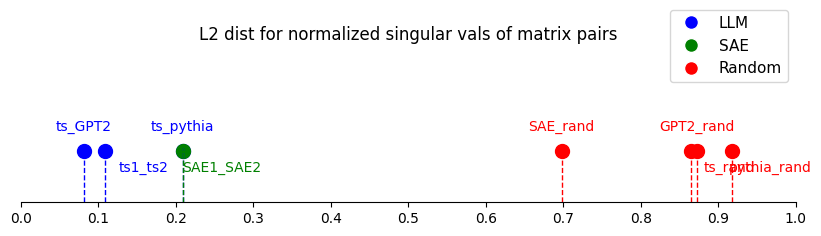

In [41]:
plot1D_L2dist_singvals(matPair_to_l2Dist_norma, norma_bool=True)

In [42]:
matPair_to_l2Dist_norma_LST = [ (v,k) for k,v in matPair_to_l2Dist_norma.items() ]
matPair_to_l2Dist_norma_LST.sort()
for v, k in matPair_to_l2Dist_norma_LST:
    print(v, k)

0.08137904 ts_GPT2
0.10865606 ts1_ts2
0.20848332 ts_pythia
0.2090404 SAE1_SAE2
0.69763449118735 SAE_rand
0.8647603724401406 ts_rand
0.8727353661583206 GPT2_rand
0.9168872253059198 pythia_rand


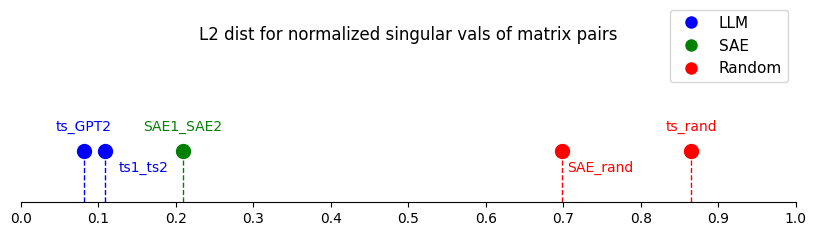

In [46]:
matPair_to_l2Dist_norma_2 = matPair_to_l2Dist_norma.copy()
del matPair_to_l2Dist_norma_2['ts_pythia']
del matPair_to_l2Dist_norma_2['pythia_rand']
del matPair_to_l2Dist_norma_2['GPT2_rand']

plot1D_L2dist_singvals(matPair_to_l2Dist_norma_2, norma_bool=True)

## labels in legend

(better for unnormalized)

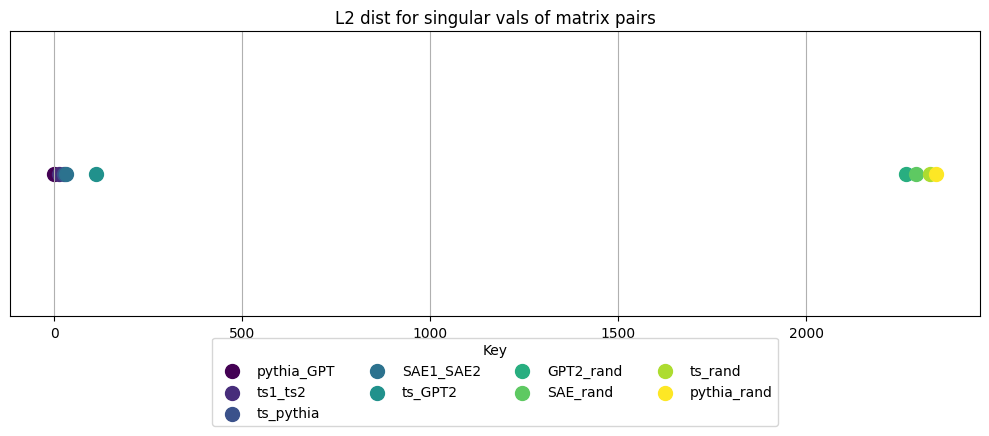

In [44]:
plot_L2dist_singvals(matPair_to_l2Dist, norma_bool=True)

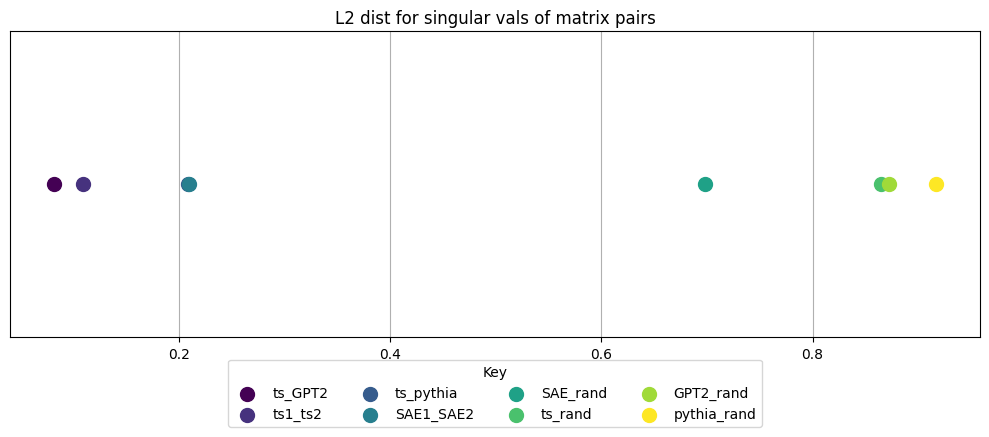

In [45]:
plot_L2dist_singvals(matPair_to_l2Dist_norma, norma_bool=False)